## Crawl [51 job website](https://www.51job.com/)

### Step by Step, Crawling one page(detailed)

1. check the [robots.txt](https://www.51job.com/robots.txt)

 User-agent: *

 Disallow: /en/

2. Analyze the website



In [140]:
# Import necessary libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import re
import json
import pandas as pd

**decode() function use utf-8 as the default to transform byte,** but 51job website use gbk encoding(right clike, inspect the webiste source code)

```
<meta http-equiv="Content-Type" content="text/html; charset=gbk">
```

As we can see, the attr charset is used to set the webpage encoding mode, so we need to use decode('gbk') to transform bytes to str.

#### get the page content 

In [161]:
# search condition : ['"上海+北京+机器学习工程师+深度学习工程师+推荐算法工程师+数据分析师+在校生\\/应届生"'
target_url = "https://search.51job.com/list/020000%252c010000,000000,7301%252c7302%252c7310%252c7501,00,9,99,+,2,1.html?lang=c&postchannel=0000&workyear=01&cotype=99&degreefrom=99&jobterm=99&companysize=99&ord_field=0&dibiaoid=0&line=&welfare="
# here 51job use gbk encode html
job_content = urlopen(target_url).read().decode('gbk')

Here if we analyze the job_content and see the website html code, we could find that all the job information are stored in the javascript

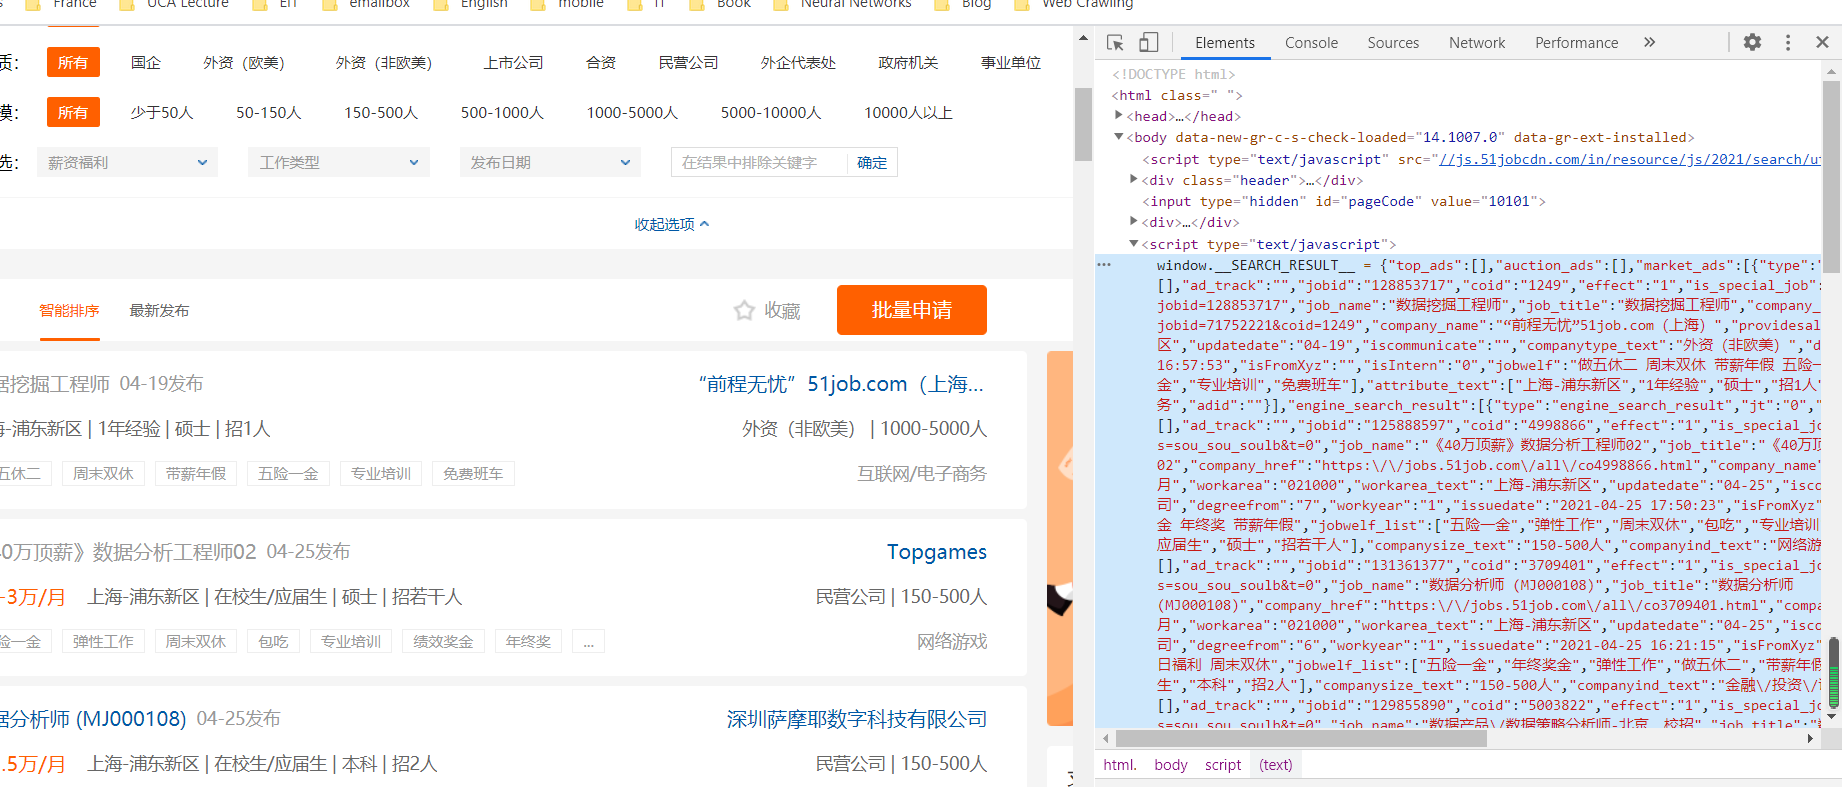

In [162]:
job_content

'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n    <link rel="icon" href="/favicon.ico" type="image/x-icon"/>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=gbk">\n    <title>【上海,北京,机器学习工程师,深度学习工程师,推荐算法工程师,数据分析师招聘，求职】-前程无忧</title>\n    <meta name="description" content="前程无忧为您提供上海,北京,机器学习工程师,深度学习工程师,推荐算法工程师,数据分析师招聘，求职信息。网聚全国各城市的人才信息，找好工作，找好员工，上前程无忧。">\n    <meta name="keywords" content="找工作,求职,人才,招聘">\n    <meta name="mobile-agent" content="format=html5; url=https://m.51job.com/search/joblist.php?jobarea=020000,010000&keyword=&partner=webmeta">\n    <meta name="mobile-agent" content="format=xhtml; url=https://m.51job.com/search/joblist.php?jobarea=020000,010000&keyword=&partner=webmeta">\n    <meta name="robots" content="all">\n    <meta http-equiv="Expires" content="0">\n    <meta http-equiv="Cache-Control" content="no-cache">\n    <meta http-equiv="Pragma" content="no-cache">\n    <link rel="dns-prefetc

#### find the job data

Write regular expressions to match all the job details




In [143]:
# using re to slice the str which including the data
# if u analyze the str content or copy it to Json website to beautify

data = re.findall("\"engine_search_result\":(.+?),\"jobid_count\"",job_content)
print(data[0])

[{"type":"engine_search_result","jt":"0","tags":[],"ad_track":"","jobid":"125888597","coid":"4998866","effect":"1","is_special_job":"","job_href":"https:\/\/jobs.51job.com\/shanghai-pdxq\/125888597.html?s=sou_sou_soulb&t=0","job_name":"《40万顶薪》数据分析工程师02","job_title":"《40万顶薪》数据分析工程师02","company_href":"https:\/\/jobs.51job.com\/all\/co4998866.html","company_name":"Topgames","providesalary_text":"1.5-3万\/月","workarea":"021000","workarea_text":"上海-浦东新区","updatedate":"04-25","iscommunicate":"","companytype_text":"民营公司","degreefrom":"7","workyear":"1","issuedate":"2021-04-25 17:50:23","isFromXyz":"","isIntern":"0","jobwelf":"五险一金 弹性工作 周末双休 包吃 专业培训 绩效奖金 年终奖 带薪年假","jobwelf_list":["五险一金","弹性工作","周末双休","包吃","专业培训","绩效奖金","年终奖","带薪年假"],"attribute_text":["上海-浦东新区","在校生\/应届生","硕士","招若干人"],"companysize_text":"150-500人","companyind_text":"网络游戏","adid":""},{"type":"engine_search_result","jt":"0","tags":[],"ad_track":"","jobid":"131361377","coid":"3709401","effect":"1","is_special_job":"","job_href":"ht

we can copy the jsonObj content and then input it on the [online JSON beautify](https://codebeautify.org/jsonviewer)

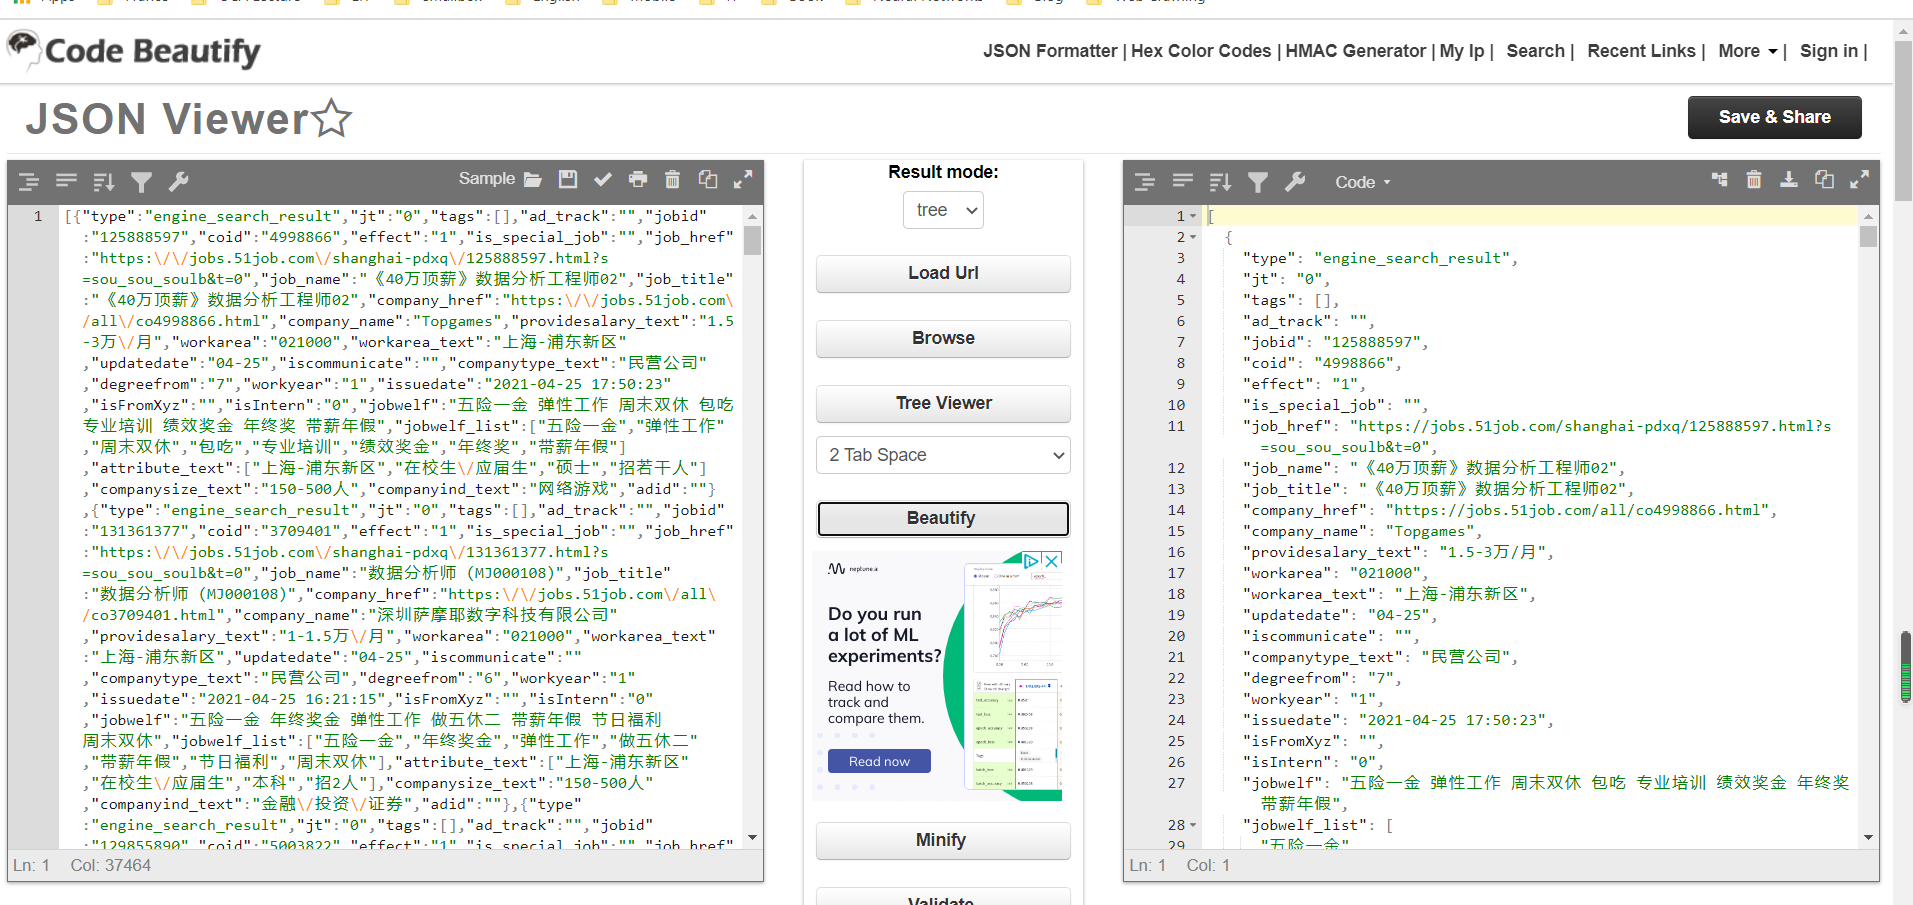

**Now let's solve, clean and save data**

In [144]:
# Now json.loads() function parses the json string data and it can be used as a normal dictionary in python.
jsonObj = json.loads(data[0])

In [145]:
jsonObj[0]

{'ad_track': '',
 'adid': '',
 'attribute_text': ['上海-浦东新区', '在校生/应届生', '硕士', '招若干人'],
 'coid': '4998866',
 'company_href': 'https://jobs.51job.com/all/co4998866.html',
 'company_name': 'Topgames',
 'companyind_text': '网络游戏',
 'companysize_text': '150-500人',
 'companytype_text': '民营公司',
 'degreefrom': '7',
 'effect': '1',
 'isFromXyz': '',
 'isIntern': '0',
 'is_special_job': '',
 'iscommunicate': '',
 'issuedate': '2021-04-25 17:50:23',
 'job_href': 'https://jobs.51job.com/shanghai-pdxq/125888597.html?s=sou_sou_soulb&t=0',
 'job_name': '《40万顶薪》数据分析工程师02',
 'job_title': '《40万顶薪》数据分析工程师02',
 'jobid': '125888597',
 'jobwelf': '五险一金 弹性工作 周末双休 包吃 专业培训 绩效奖金 年终奖 带薪年假',
 'jobwelf_list': ['五险一金', '弹性工作', '周末双休', '包吃', '专业培训', '绩效奖金', '年终奖', '带薪年假'],
 'jt': '0',
 'providesalary_text': '1.5-3万/月',
 'tags': [],
 'type': 'engine_search_result',
 'updatedate': '04-25',
 'workarea': '021000',
 'workarea_text': '上海-浦东新区',
 'workyear': '1'}

In [146]:
# write data into json mode
with open('one_page_data.json', 'w') as f:
    json.dump(data, f)

In [147]:
# Build dataframe to save the data you need
Job_Dataframe = pd.DataFrame (columns = ['job name', 'company name', 'workarea', 'salary', 'update time'])
Job_Dataframe

,job name,company name,workarea,salary,update time


In [148]:
for job in jsonObj:
  dict = {
    "job name":job['job_name'],
    "company name":job['company_name'],
    "workarea":job['workarea_text'],
    "salary":job['providesalary_text'],
    "update time":job['issuedate'],
    }
  Job_Dataframe = Job_Dataframe.append(dict, ignore_index=True)

In [149]:
Job_Dataframe.head()

,job name,company name,workarea,salary,update time
0,《40万顶薪》数据分析工程师02,Topgames,上海-浦东新区,1.5-3万/月,2021-04-25 17:50:23
1,数据分析师 (MJ000108),深圳萨摩耶数字科技有限公司,上海-浦东新区,1-1.5万/月,2021-04-25 16:21:15
2,数据产品/数据策略分析师-北京，校招,北京牛卡福网络科技有限公司,北京-朝阳区,1-2万/月,2021-04-25 16:03:44
3,数据分析员,上海自贸区红酒交易中心股份有限公司,上海-浦东新区,0.8-1万/月,2021-04-25 14:03:19
4,机器视觉实习工程师（江苏昆山）,苏州昀冢电子科技股份有限公司,上海,0.5-1.2万/月,2021-04-25 04:53:46


#### Save the data to csv file

In [152]:
Job_Dataframe.sort_values("update time", inplace=True, ascending=False)
Job_Dataframe.head()

,job name,company name,workarea,salary,update time
0,《40万顶薪》数据分析工程师02,Topgames,上海-浦东新区,1.5-3万/月,2021-04-25 17:50:23
35,数据分析（2021届毕业生）,南京烽火星空通信发展有限公司,北京,1.3-1.6万/月,2021-04-25 17:36:36
36,数据分析师（2021年校招）,上海卓易科技股份有限公司,上海-徐汇区,1-1.5万/月,2021-04-25 17:12:59
37,算法工程师实习生(J10579),创新奇智（北京）科技有限公司,北京-海淀区,280元/天,2021-04-25 17:00:01
27,数据分析,上海韵达货运有限公司,上海-青浦区,4.5-6千/月,2021-04-25 17:00:01


In [155]:
# save data without index
Job_Dataframe.to_csv("one_page_data.csv", index=False)

### Crawl all pages job data

Here we can esaily to save all the job which are on one page, next we want to crawl all the pages(normally the results have many pages)

Bascially, we can use the next page button to get info, but I didn't find the link.

But fortunately there are some data within that javascript code.

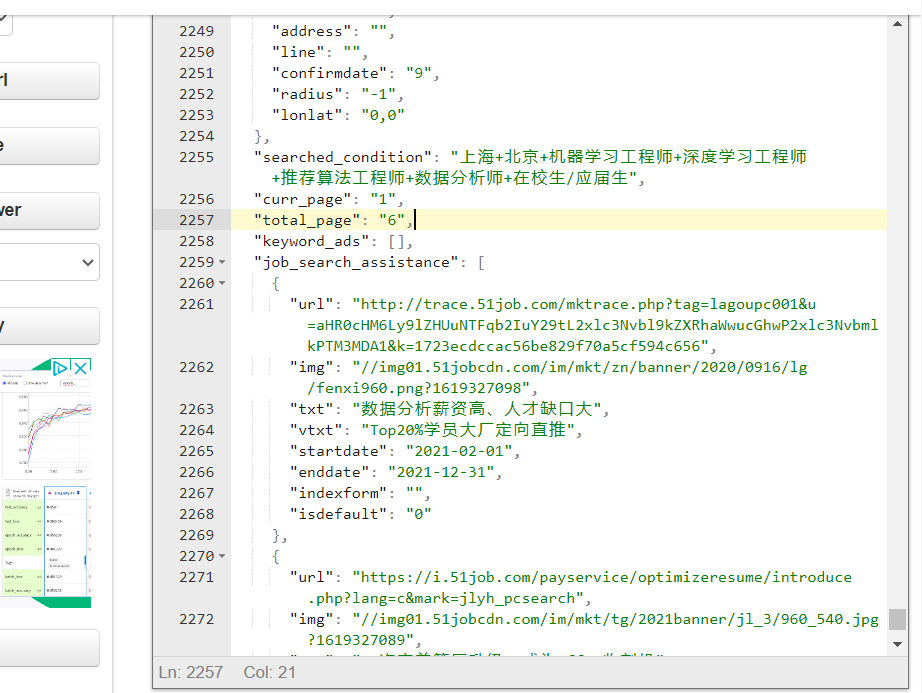

So first we can get current page number and total page number, and then replace the page number in target url

According to target url, get the current page content containing the current page job data

In [78]:
def get_url_content(target_url):
  job_content = urlopen(target_url).read().decode('gbk')
  return job_content

Accoding to target url, get the current page number, total page number and also the search conditons

In [81]:
def get_nextpage_list(target_url):
  job_content = get_url_content(target_url)
  # get the searched_condition
  searched_condition = re.findall("\"searched_condition\":(.+?),",job_content)
  # get the current page number
  current_page = re.findall("\"curr_page\":(.+?),",job_content)
  # get all the total page number
  total_page = re.findall("\"total_page\":(.+?),",job_content)

  # get the current page number
  current_page = int(current_page[0][1])
  # get all the total page number
  total_page =  int(total_page[0][1])

  return current_page, total_page, searched_condition

In [184]:
# test
get_nextpage_list(target_url)

(1, 6, ['"上海+北京+机器学习工程师+深度学习工程师+推荐算法工程师+数据分析师+在校生\\/应届生"'])

According to target url, get all job data, return a dataframe containg all data with columns : 

columns = ['job name', 'company name', 'workarea', 'salary', 'update time']

In [163]:
def get_all_job_data(target_url):
  # create dataframe
  Job_Dataframe = pd.DataFrame (columns = ['job name', 'company name', 'workarea', 'salary', 'update time'])

  # according target_url get current page info
  current_page, total_page, searched_condition = get_nextpage_list(target_url)

  # get all target url via replacing the page number in target_url
  all_target_url = [target_url]
  for i in range(current_page, total_page):
    next_page_link = target_url.replace("1.html",str(i+1)+".html")
    all_target_url.append(next_page_link)

  # loop and get all pages content
  for target_url_item in all_target_url:
    # get the corresponding webpage content
    job_content = get_url_content(target_url_item)

    # wait a bit in case being banned
    time.sleep(1)

    # find the job data
    data = re.findall("\"engine_search_result\":(.+?),\"jobid_count\"",job_content)

    # Now json.loads() function parses the json string data and it can be used as a normal dictionary in python.
    jsonObj = json.loads(data[0])
    
    # save the job info to the dataframe
    for job in jsonObj:
      dict = {
        "job name":job['job_name'],
        "company name":job['company_name'],
        "workarea":job['workarea_text'],
        "salary":job['providesalary_text'],
        "update time":job['issuedate'],
        }
      Job_Dataframe = Job_Dataframe.append(dict, ignore_index=True)
  
  return Job_Dataframe

Save dataframe to csv file without index

In [181]:
def save_csv(dataframe, file_name):
  # don't save the index
  dataframe.to_csv(file_name, index = False) 

In [165]:
job_dataframe = get_all_job_data(target_url)
job_dataframe.head()

,job name,company name,workarea,salary,update time
0,《40万顶薪》数据分析工程师02,Topgames,上海-浦东新区,1.5-3万/月,2021-04-25 17:50:23
1,数据分析师 (MJ000108),深圳萨摩耶数字科技有限公司,上海-浦东新区,1-1.5万/月,2021-04-25 16:21:15
2,数据产品/数据策略分析师-北京，校招,北京牛卡福网络科技有限公司,北京-朝阳区,1-2万/月,2021-04-25 16:03:44
3,数据分析员,上海自贸区红酒交易中心股份有限公司,上海-浦东新区,0.8-1万/月,2021-04-25 14:03:19
4,机器视觉实习工程师（江苏昆山）,苏州昀冢电子科技股份有限公司,上海,0.5-1.2万/月,2021-04-25 04:53:46


#### Cleaning before saving

Here we can get all the page data hidden in the javascript data.

Next let's make some operations on this data

1. sort it by date
2. remove duplicate rows

---



In [166]:
print(len(pd.unique(job_dataframe['job name'])))

240


sort the data by date 

In [167]:
#sorting by update time
job_dataframe.sort_values("update time", inplace=True, ascending=False)
job_dataframe

,job name,company name,workarea,salary,update time
230,算法实习生-商业化技术,字节跳动,上海,4-8千/月,2021-04-26 01:22:54
231,计算机视觉算法实习生-电商,字节跳动,北京,0.8-1万/月,2021-04-26 01:18:09
20,AI Lab机器学习系统实习生,字节跳动,北京,0.8-1万/月,2021-04-26 01:13:01
227,《40万顶薪》数据挖掘工程师02,Topgames,上海-浦东新区,1.5-3万/月,2021-04-25 17:50:23
0,《40万顶薪》数据分析工程师02,Topgames,上海-浦东新区,1.5-3万/月,2021-04-25 17:50:23
...,...,...,...,...,...
168,材料检测工程师助理（偏数据分析）,欧陆埃文思材料科技（上海）有限公司,上海-闵行区,0.8-1万/月,2021-03-02 10:01:23
169,数据分析师,长城基金管理有限公司,异地招聘,0.8-1万/月,2021-03-01 14:19:37
259,数据分析师,长城基金管理有限公司,异地招聘,0.8-1万/月,2021-03-01 14:19:32
236,数据分析工程师 (MJ001301),神州数码信息服务股份有限公司,北京,1-1.5万/月,2021-03-01 07:07:53


we can easily find the data has duplicates

In [178]:
# dropping ALL duplicte values
# inplace = True will repalce job_dataframe
cleaned_job_data = job_dataframe.drop_duplicates(subset =["workarea","update time"], inplace = False)
cleaned_job_data

,job name,company name,workarea,salary,update time
230,算法实习生-商业化技术,字节跳动,上海,4-8千/月,2021-04-26 01:22:54
231,计算机视觉算法实习生-电商,字节跳动,北京,0.8-1万/月,2021-04-26 01:18:09
20,AI Lab机器学习系统实习生,字节跳动,北京,0.8-1万/月,2021-04-26 01:13:01
227,《40万顶薪》数据挖掘工程师02,Topgames,上海-浦东新区,1.5-3万/月,2021-04-25 17:50:23
35,数据分析（2021届毕业生）,南京烽火星空通信发展有限公司,北京,1.3-1.6万/月,2021-04-25 17:36:36
...,...,...,...,...,...
168,材料检测工程师助理（偏数据分析）,欧陆埃文思材料科技（上海）有限公司,上海-闵行区,0.8-1万/月,2021-03-02 10:01:23
169,数据分析师,长城基金管理有限公司,异地招聘,0.8-1万/月,2021-03-01 14:19:37
259,数据分析师,长城基金管理有限公司,异地招聘,0.8-1万/月,2021-03-01 14:19:32
236,数据分析工程师 (MJ001301),神州数码信息服务股份有限公司,北京,1-1.5万/月,2021-03-01 07:07:53


#### save the final data

In [183]:
save_csv(cleaned_job_data,"51jobData.csv")

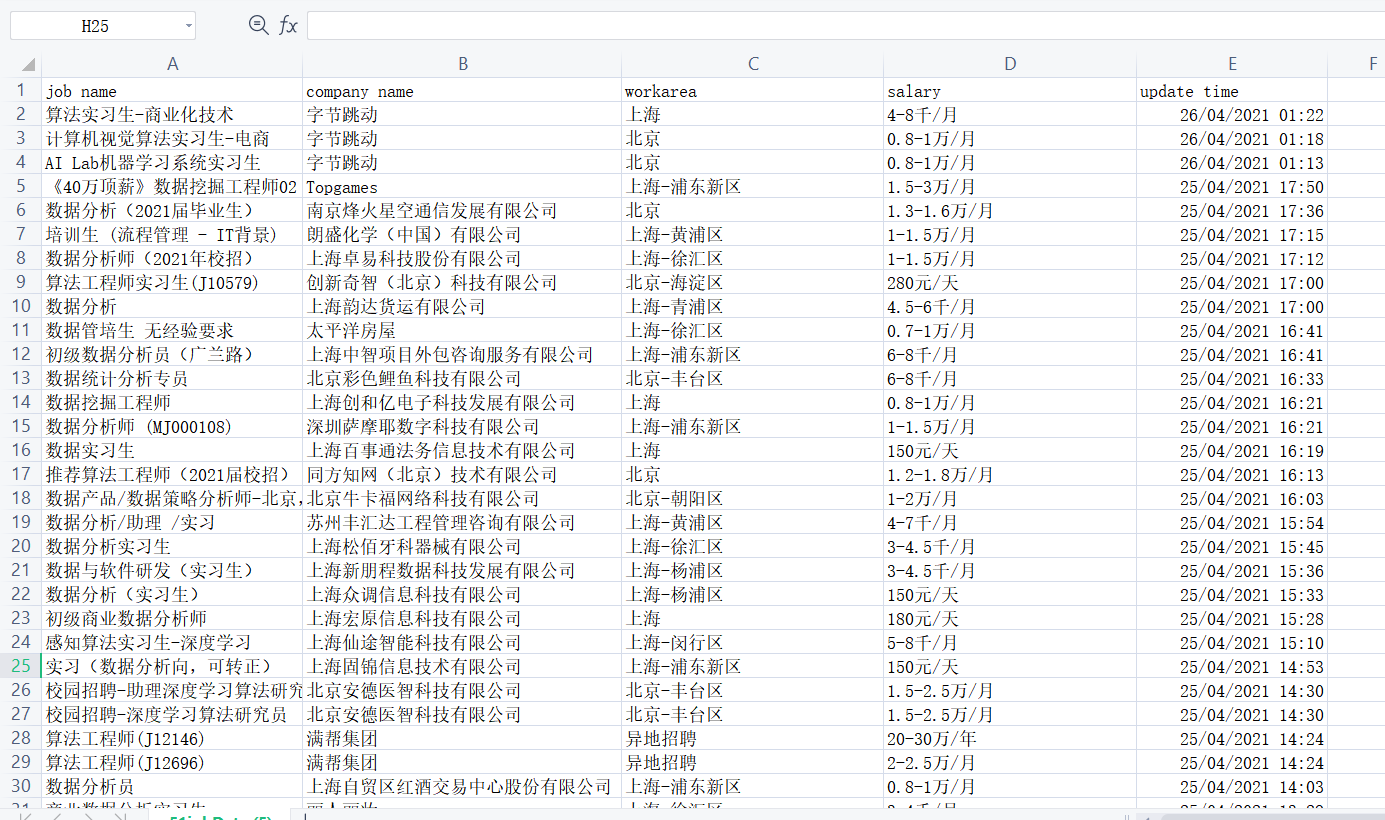

###In Summary

So basically it's easy to get the job data if we find all the data is hidden in the javascript part.

And then we can extract these job list via regular expression.

Note: 
1. Due to 51job encoding mode is 'gbk', and urlopen default decoding mode is utf-8, if we didnt set the decoding mode as 'gbk', we wouldnt find the job data.

2. Normally we can use soup to transform the html data got from urlopen which is easy to extract information, for example:


```
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

target_url = "https://search.51job.com/list/020000%252c010000,000000,7301%252c7302%252c7310%252c7501,00,9,99,+,2,1.html?lang=c&postchannel=0000&workyear=01&cotype=99&degreefrom=99&jobterm=99&companysize=99&ord_field=0&dibiaoid=0&line=&welfare="
job_content = urlopen(target_url).read().decode('gbk')
job_content_soup = soup(job_content, 'html5lib')

job_content_soup.find('div', {'class':'j_joblist'})
job_content_soup.title
```
if we analyze the html structure, the data displayed via ul tag, and each job data in li tag. But I cannot get ul information, I don't why, although job_content has the data.

if you right click the page and then view the source code, we can find the same structure as job_content_soup. So I guess due to the data is loaded by javascript, which means dynamic -> so I need to learn how to scrapy dynamic data. (I'm not sure if I guessed right)



### Reference



1.   https://www.crummy.com/software/BeautifulSoup/bs4/doc/
2.   https://www.youtube.com/watch?v=4W21UMc-eO0
3. https://blog.csdn.net/Xu_sa_sa/article/details/86093243
4. https://pandas.pydata.org/docs/reference/api/pandas.unique.html
